<center><h1>Examen Interciclo</h1></center>

### Nombre: Christian Pillaga

- Como primer paso importamos las librerías necesarias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly 

from facebook_scraper import get_posts
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from plotly.graph_objs import Scatter, Layout
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

%matplotlib inline

- Luego creamos un metodo el cual se encargará de contar los post en nustro caso de Alvaro Noboa y Yaku Perez

In [2]:
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont

postYP = []

for post in get_posts('yakuperezoficial', pages=4):
        post['Word count'] = len(post['text'])
        postYP.append(post)    
        
postYP = pd.DataFrame(postYP)
postYP.describe()

,likes,comments,shares,Word count
count,14.000000,14.000000,14.000000,14.000000
mean,1395.214286,340.357143,187.571429,182.928571
std,667.002039,311.048749,253.976593,44.816659
min,595.000000,49.000000,0.000000,120.000000
25%,897.750000,106.500000,0.000000,156.250000
50%,1431.500000,235.000000,0.000000,164.500000
75%,1637.250000,494.750000,311.750000,210.000000
max,2881.000000,1061.000000,723.000000,281.000000


In [3]:
postAN = []

for post in get_posts('AlvaroNoboaPonton', pages=4):
        post['Word count'] = len(post['text'])
        postAN.append(post)  
        
postAN = pd.DataFrame(postAN)
postAN.describe()

,likes,comments,shares,Word count
count,14.000000,14.000000,14.0,14.000000
mean,30700.000000,3624.785714,0.0,346.500000
std,24823.968126,2716.000543,0.0,250.764907
min,7108.000000,565.000000,0.0,21.000000
25%,12271.250000,1348.000000,0.0,105.500000
50%,25873.500000,2552.000000,0.0,338.500000
75%,41714.000000,5144.250000,0.0,525.250000
max,80973.000000,8191.000000,0.0,725.000000


- Una vez obtenido el contador de post, procedemos a listar de donde se obtuvo los resultados (Textosm, Post, Textos compartidos, Videos, etc) 

In [4]:
fbPostYP = pd.DataFrame(postYP)
fbPostAN = pd.DataFrame(postAN)


fbPostYP.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,Word count
0,3338728796266857,Toda una vida luchando por el cuidado del agua...,Toda una vida luchando por el cuidado del agua...,WWW.YAKUPEREZ.COM\nYaku - Defensor del agua y ...,2021-01-06 19:10:28,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,435238704282719,2499,341,0,https://facebook.com/watch?v=435238704282719,http://www.yakuperez.com/,2069422096530873,[],281
1,855679481944370,⭕️ EN VIVO | Compartimos con nuestros hermanos...,⭕️ EN VIVO | Compartimos con nuestros hermanos...,,2021-01-11 10:33:43,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.1...,855679481944370,595,308,330,https://facebook.com/watch?v=855679481944370,None,2069422096530873,[],163
2,807482313315410,⭕️ EN VIVO | Gracias hermanos de este pueblo i...,⭕️ EN VIVO | Gracias hermanos de este pueblo i...,,2021-01-11 09:56:34,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.1...,807482313315410,800,546,254,https://facebook.com/watch?v=807482313315410,None,2069422096530873,[],163
3,3342540072552396,Con mi saxofón 🎷 pude ganar un poco de dinero ...,Con mi saxofón 🎷 pude ganar un poco de dinero ...,,2021-01-11 09:52:16,https://scontent.fgye1-1.fna.fbcdn.net/v/t1.0-...,None,None,None,678,49,0,https://facebook.com/story.php?story_fbid=3342...,None,2069422096530873,[https://scontent.fgye1-1.fna.fbcdn.net/v/t1.0...,120
4,3342143769258693,El sueño de los ciudadanos de #Manta es vivir ...,El sueño de los ciudadanos de #Manta es vivir ...,,2021-01-10 21:07:37,None,https://video.fgye1-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,144087654182654,882,77,0,https://facebook.com/watch?v=144087654182654,None,2069422096530873,[],232


In [6]:
fbPostAN.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,Word count
0,2900174033638351,Con Dios; yo protesto junto al pueblo ecuatori...,Con Dios; yo protesto junto al pueblo ecuatori...,,2021-01-10 01:16:38,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,710171033018217,7139,660,0,https://facebook.com/watch?v=710171033018217,None,1505940076395094,[],391
1,2900173893638365,"Con Dios; los políticos de siempre, los corrup...","Con Dios; los políticos de siempre, los corrup...",,2021-01-10 01:16:35,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,1669816136512969,14260,1354,0,https://facebook.com/watch?v=1669816136512969,None,1505940076395094,[],553
2,2899044780417943,Señor Abogado Jaime Nebot del Partido Social C...,Señor Abogado Jaime Nebot del Partido Social C...,,2021-01-08 16:09:32,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.1...,398934714505128,8247,1021,0,https://facebook.com/watch?v=398934714505128,None,1505940076395094,[],517
3,2899036873752067,"Ecuatorianos, con Dios.\nEstoy de acuerdo que ...","Ecuatorianos, con Dios.\nEstoy de acuerdo que ...",,2021-01-08 15:54:03,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,727465568145225,26101,2602,0,https://facebook.com/watch?v=727465568145225,None,1505940076395094,[],116
4,2898381900484231,Con Dios ecuatorianos\nInvito a que abandonen ...,Con Dios ecuatorianos\nInvito a que abandonen ...,,2021-01-07 22:33:49,None,https://scontent.fgye1-1.fna.fbcdn.net/v/t42.1...,https://scontent.fgye1-1.fna.fbcdn.net/v/t15.5...,219052496603916,44086,7050,0,https://facebook.com/watch?v=219052496603916,None,1505940076395094,[],725


- Ahora se realizará unas gráficas de acuerdo a lo obtenido

array([[<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'shares'}>,
        <AxesSubplot:title={'center':'Word count'}>]], dtype=object)

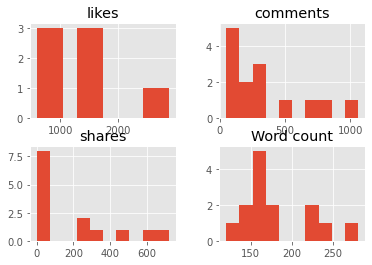

In [8]:
postYP.drop(['post_id','post_url', 'time'],1).hist()

array([[<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'shares'}>,
        <AxesSubplot:title={'center':'Word count'}>]], dtype=object)

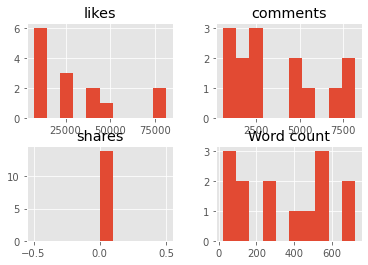

In [9]:
postAN.drop(['post_id','post_url', 'time'],1).hist()

- Finalmente se realiza las regresiones de acuerdo a los datos obtenidos tanto para Yaku Perez como para Alvaro noboa

In [16]:
likesYP = postYP['likes']
likesAN = postAN['likes']

y = np.array(likesYP)
x = np.array(range(0, len(y)))
regYP = linear_model.LinearRegression()
regYP.fit(x.reshape(-1, 1), y)
prediccionYP = regYP.predict(x.reshape(-1, 1))

yn = np.array(likesAN)
xn = np.array(range(0, len(yn)))
regAN = linear_model.LinearRegression()
regAN.fit(xn.reshape(-1, 1), yn)
prediccionAN = regAN.predict(xn.reshape(-1, 1))

print("Regresión Yaku Perez: ", regYP.coef_)
print("Regresión Alvaro Noboa: ", regAN.coef_)
print("Error cuadrado medio: ",  mean_squared_error(x.reshape(-1, 1), y))


Regresión Yaku Perez:  [18.62197802]
Regresión Alvaro Noboa:  [1010.97582418]
Error cuadrado medio:  2341052.1428571427


Gráfica Regresión Yaku Perez


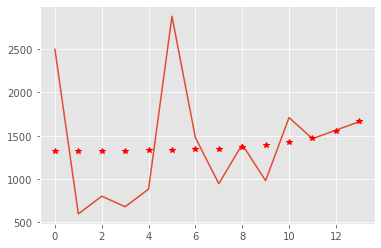

In [20]:
def reg_expYP(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_expYP(x[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_expYP, x, y, g)
for i in range(len(y)):
    pre[i] = reg_expYP(x[i], popt[0], popt[1], popt[2], popt[3])

print("Gráfica Regresión Yaku Perez")
plt.plot(x, y)
plt.plot(x, pre, 'r*')

Gráfica Regresión Alvaro Noboa


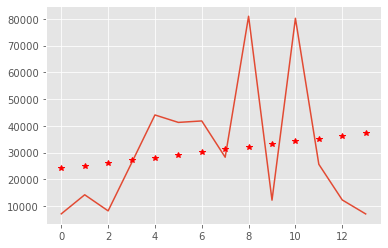

In [19]:
def reg_expAN(xn, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * xn) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_expAN(xn[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_expAN, xn, yn, g)
for i in range(len(yn)):
    pre[i] = reg_expAN(xn[i], popt[0], popt[1], popt[2], popt[3])
    
print("Gráfica Regresión Alvaro Noboa")
plt.plot(xn, yn)
plt.plot(xn, pre, 'r*')